In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data_dir = "/data3/lsf/Pein/Power-Prediction/data/"
train_data = pd.read_csv(data_dir + "train_data_92.csv")
test_data = pd.read_csv(data_dir + "test_data_92.csv")

In [2]:
# Define features and target
features = [
    col for col in train_data.columns if col not in ["time", "lead_hour", "power"]
]
X = train_data[features]
y = train_data["power"]

           altitude       azimuth          u100          v100          fg10  \
count  14592.000000  14592.000000  14592.000000  14592.000000  14592.000000   
mean      -0.681957    180.373771     -4.871516      1.027430      9.089765   
std       42.225164     97.193872      3.973626      6.361391      3.421041   
min      -86.015315      0.015230    -14.992552    -13.752343      0.739450   
25%      -37.261300     91.498073     -8.015861     -3.357683      6.428766   
50%        0.096351    179.962377     -5.667767      0.209845      9.071489   
75%       35.922406    268.938849     -1.559643      5.509896     11.542283   
max       84.922569    359.849807     10.253075     16.733427     20.036013   

                u10           v10          u200          v200           d2m  \
count  14592.000000  14592.000000  14592.000000  14592.000000  14592.000000   
mean      -4.161532      0.306618     -5.013961      1.721480    293.067924   
std        3.261260      5.033596      4.502345    

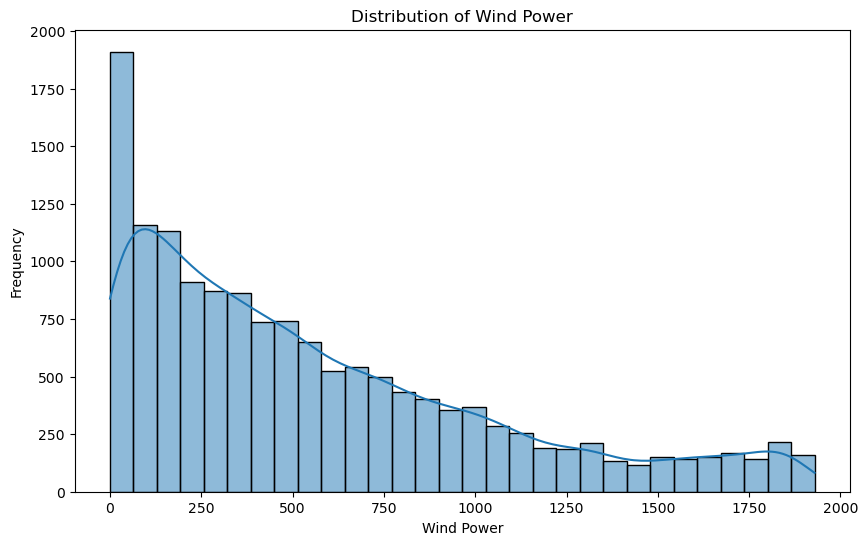

In [3]:
# Basic statistics of the dataset
print(train_data[features + ["power"]].describe())

correlation_matrix = train_data[features + ["power"]].corr()
print(correlation_matrix)

# Plot distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Wind Power")
plt.xlabel("Wind Power")
plt.ylabel("Frequency")
plt.show()

In [12]:
def plot_features(data, features, start_index):
    end_index = start_index + 9
    selected_features = features[start_index:end_index]

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
    fig.suptitle("Feature Visualizations")

    for idx, feature in enumerate(selected_features):
        print(f"Plotting {feature}...")
        ax = axes[idx // 3, idx % 3]
        x = np.arange(1, len(data) + 1)
        y = data[feature]
        sns.lineplot(x=x, y=y, ax=ax)
        ax.set_title(f"{feature}")
        ax.set_xlabel("Index")
        ax.set_ylabel("Value")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Plotting viwvn...
Plotting ws200...
Plotting ws100...
Plotting ws10...
Plotting power...


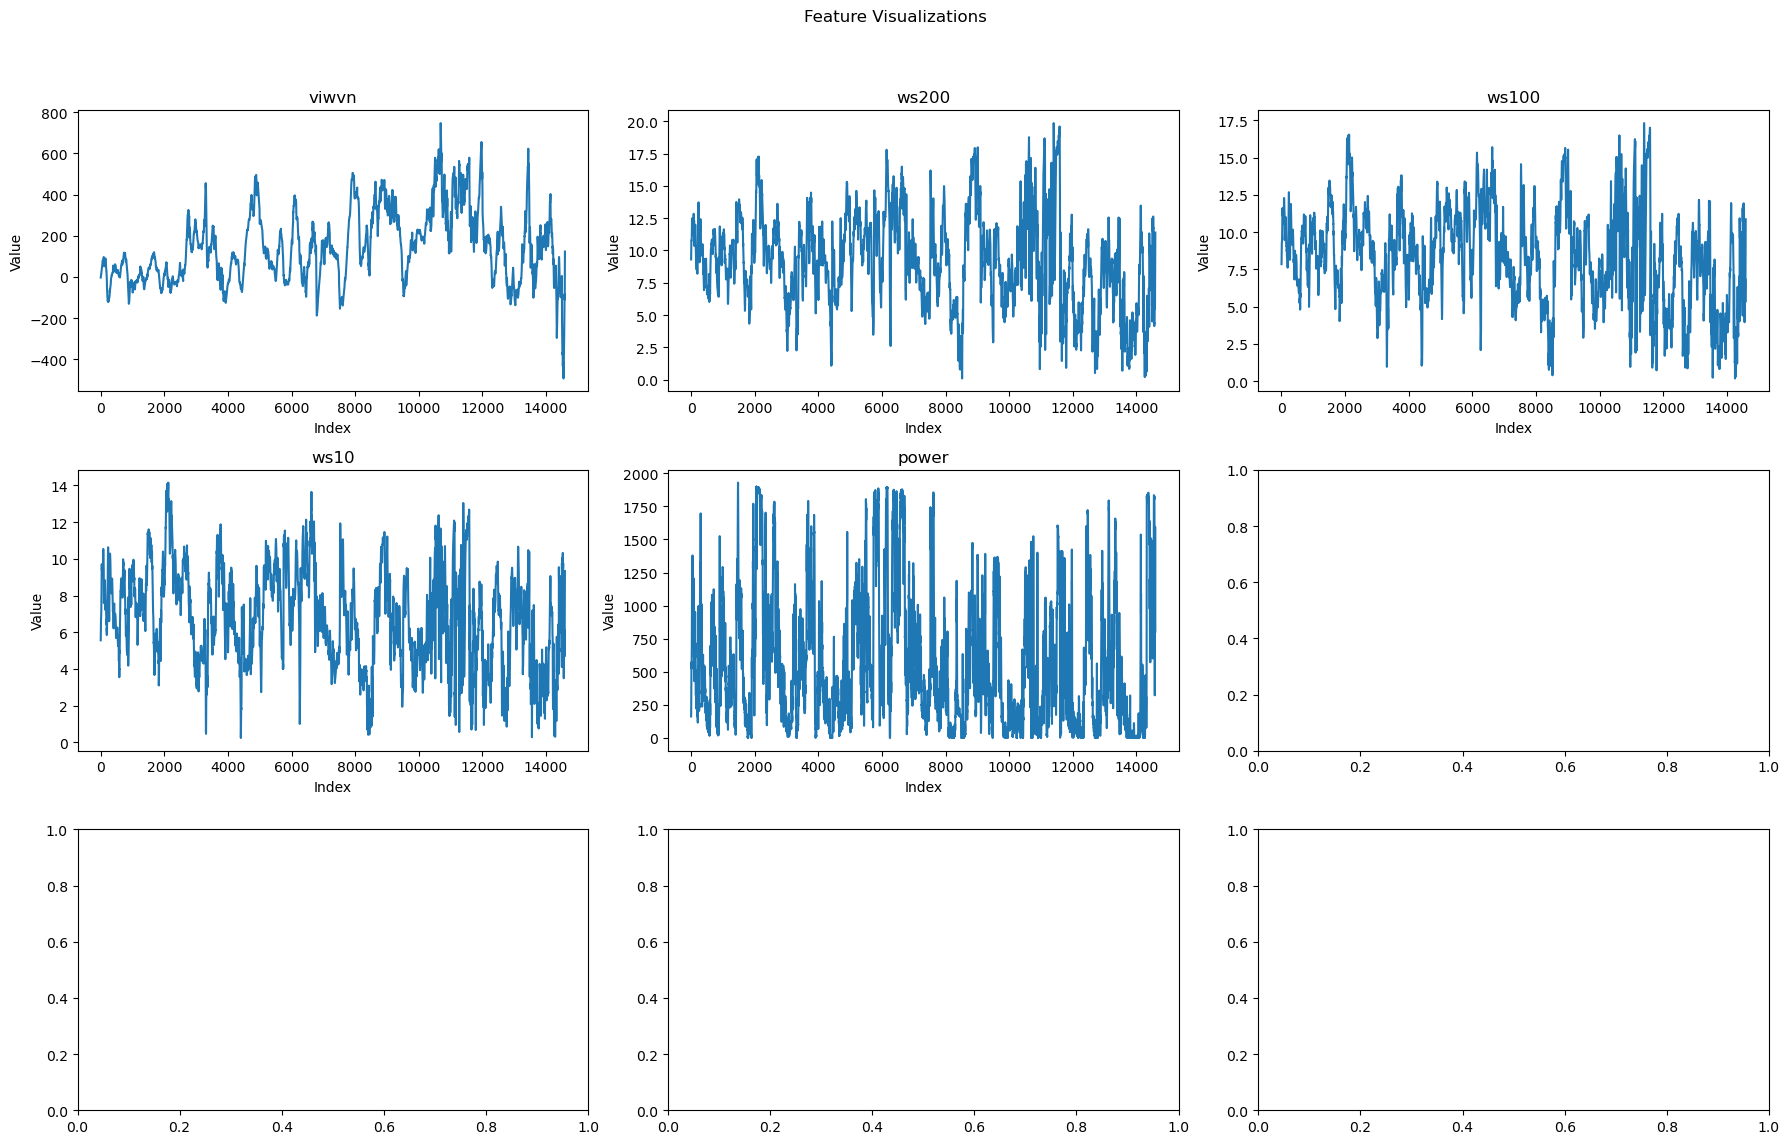

In [15]:
# Define start index
start_index = 85

# Call the function to plot features
plot_features(train_data[features + ["power"]], features + ["power"], start_index)

0         162.75
1         178.17
2         223.41
3         289.28
4         347.96
          ...   
14587    1290.00
14588    1124.29
14589    1181.76
14590    1234.72
14591     803.60
Name: power, Length: 14592, dtype: float64